# TODO 

* Move required packages to environment.yml and requirements.txt
    - cairosvg
    - torch
    - torchvision
    - requests

In [1]:
%pip install cairosvg

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os

# Create svg dir
save_dir = "../data/augmented/new_knots_svg/"
try:
    os.makedirs(save_dir)
except FileExistsError:
    print(f"One or more directories in '{save_dir}' already exist.")
except PermissionError:
    print(f"Permission denied: Unable to create '{save_dir}'.")
except Exception as e:
    print(f"An error occurred: {e}")

# Create png dir
save_dir = "../data/augmented/new_knots_png/"
try:
    os.makedirs(save_dir)
except FileExistsError:
    print(f"One or more directories in '{save_dir}' already exist.")
except PermissionError:
    print(f"Permission denied: Unable to create '{save_dir}'.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
knots_count = [1, 0, 0, 1, 1, 2, 3, 7, 21, 49, 3] # Number of knots with i = 1,2,..,11 crossings represented
                                                  # on https://prideout.net/blog/svg_knots/knottable_v1.svg

IMG_SIZE = 480 # Size of the output image in px; influences on the complexity of the filling
               # 480 is size of picture from our 801-knots database so we can use that one too

In [ ]:
import urllib.request
import cairosvg
from PIL import Image

for cross_num in range(len(knots_count)):
  for i in range(knots_count[cross_num]):
    url = f"https://prideout.net/blog/svg_knots/knots/{cross_num}_{i+1}.svg"
    full_path = f"../data/augmented/new_knots_svg/{cross_num}_{i+1}.svg"
    urllib.request.urlretrieve(url, full_path)

    # Convert svg to png
    cairosvg.svg2png(bytestring=open(f"../data/augmented/new_knots_svg/{cross_num}_{i+1}.svg", 'rb').read(), write_to=f"../data/augmented/new_knots_png/{cross_num}_{i+1}.png", output_width=IMG_SIZE, output_height=IMG_SIZE)

    # Fill png with white
    bg = Image.new("RGBA", (IMG_SIZE, IMG_SIZE), "WHITE")
    fg = Image.open(f"../data/augmented/new_knots_png/{cross_num}_{i+1}.png")
    bg.paste(fg, (0, 0), fg)
    bg.save(f"../data/augmented/new_knots_png/{cross_num}_{i+1}.png")

    # Clear image of errors
    pixels_bg = bg.load()
    img = Image.new(bg.mode, bg.size)
    pixels = img.load()
    for x in range(IMG_SIZE):
      for y in range(IMG_SIZE):
        if(x == 0 or y == 0 or x == IMG_SIZE-1 or y == IMG_SIZE-1):
          pixels[x, y] = (255, 255, 255, 255)
        else:
          if(pixels_bg[x-1, y-1] == (0, 0, 0, 255) or
             pixels_bg[x-1, y] == (0, 0, 0, 255) or
             pixels_bg[x-1, y+1] == (0, 0, 0, 255) or
             pixels_bg[x, y-1] == (0, 0, 0, 255) or
             pixels_bg[x, y] == (0, 0, 0, 255) or
             pixels_bg[x, y+1] == (0, 0, 0, 255) or
             pixels_bg[x+1, y-1] == (0, 0, 0, 255) or
             pixels_bg[x+1, y] == (0, 0, 0, 255) or
             pixels_bg[x+1, y+1] == (0, 0, 0, 255)
             ):
            pixels[x, y] = (0, 0, 0, 255)
          else:
            pixels[x, y] = (255, 255, 255, 255)
    img.save(f"../data/augmented/new_knots_png/{cross_num}_{i+1}.png")

Pulling and processing P. Rideout's knots took my computer 47.8s

In [ ]:
%pip install torch

  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 26.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.1 MB/s eta 0:00:00
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [ ]:
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.0 MB/s eta 0:00:00


In [13]:
import torch
import torchvision.transforms as transforms

def png_to_tensor(path : str =None, png_image : Image =None) -> torch.Tensor:
  if(path != None):
    png_image = Image.open(path)
  transform = transforms.PILToTensor()
  return transform(png_image)

def tensor_to_png(tensor_image) -> Image:
  transform = transforms.ToPILImage()
  return transform(tensor_image)

In [ ]:
%pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)


In [17]:
import requests
from pathlib import Path

# Define the target directory and file path
helpers_dir = Path("../src/utils")
helpers_file = helpers_dir / "helpers.py"

# Ensure the directory exists
helpers_dir.mkdir(parents=True, exist_ok=True)

# Check if the file already exists
if helpers_file.is_file():
    print("helpers.py already exists in src/utils/, skipping download")
else:
    print("Downloading helpers.py into src/utils/")
    url = "https://raw.githubusercontent.com/pytorch/vision/refs/heads/main/gallery/transforms/helpers.py"
    response = requests.get(url)
    
    # Write the file
    with open(helpers_file, "wb") as f:
        f.write(response.content)

    print("Download complete.")

Download complete.


In [18]:
# What does this do? 
def fill_to(str, num):
  return "0"*(num-len(str)) + str

# About uniformly distributed transformations

Suppose we have $K(n)$ knots with $n$ crossings, and $T$ available transformations. We want to know how many transformations we need to apply to get roughly the same amount of output knots. Let $T(n)$ be the number of transformed pictures for knot with $n$ crossings. The first and the naivest one can do to equitably distribute transforms to abide by simple proportion: 

$$T(n) \cdot K(n) = T(m) \cdot K(m) \implies T(n) = T(m) \frac{K(m)}{K(n)}$$ 

Since the smallest value of $K$ is $1$ ($n = 0, 3, 4$) and the maximum value of $K$ is $2^{N}$ we would need $2^N = T(0) = T(3) = T(4)$. 

For each crossing number $n$, we would need $K(n) = \max(1, \text{round}(\frac{2^{k}}{T(n)}))$ to achieve $2^N = K(n)T(n)$. 
<!-- where $round(x) = x, \{x\} < 0.5, [x]+1 \ \text{otherwise}$ where $\{x\}$ and $[x]$ are fractional and integer parts respectively. -->

In the following considerations we will omit $n$ as we'll deal only with one crossing number at a time? Let $f(i)$ be the number of $i$-th transform needed? To achieve uniformly distributed transformations, the ideal case is $f(i) = f(j)$ for all $i,j$. Let's use bit string $s$ where $i$-th bit represents whether the $i$-th transormation is applied or not. Thus, $f(i)$ shows how many times we set $i$-th bit. So we cannot have diferent counts since each $s$ requires us to define every bit so the values of $f$'s must be the same. 

We want our $i$-th transform to be completely random, so $P(s[i+1] = 0|s[i]=s) = \frac{1}{2}$. Then we set $s[i] = 0$ in $\lceil \frac{f(i)}{2} \rceil$ cases and $s[i] = 1$ in $\lfloor \frac{f(i)}{2} \rfloor$ (we are also able to do it vice versa, but it doesn't give any impact and increase average runtime since it is biased to apply transformation).

Suppose that at the $l$-th step we have $a$ cases $s[i] = 0$ left and $b$ respectively. Hence, we do not apply $i$-th transform and update $a = a - 1$ with probability $p(s[i] = 0) = \frac{a}{a+b}$ and apply and update $b = b - 1$ with $p(s[i] = 0) = \frac{b}{a+b}$.

Doing that for each $s[i]$ we obtain completely random bit string $s$. This is how we will randomize application of transforms. 

In [ ]:
# Access helpers 
import sys
sys.path.append(str(Path().resolve().parent))
from src.utils import plot_detected_objects

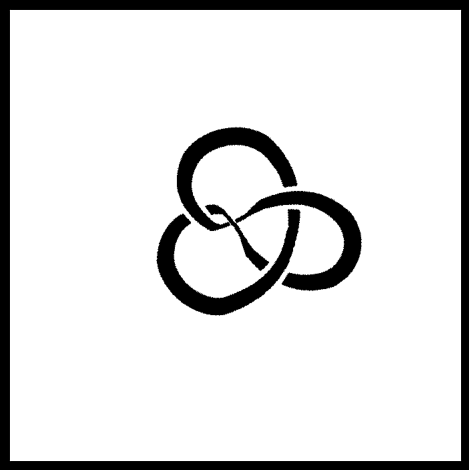

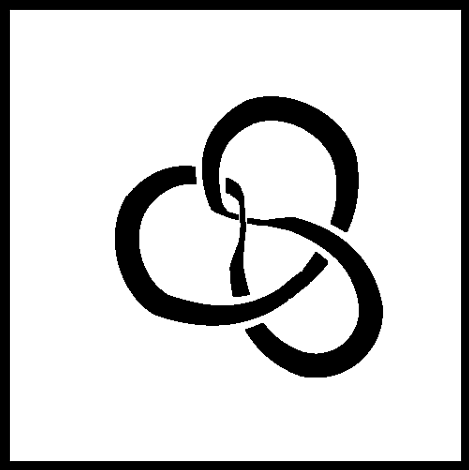

In [ ]:
# Apply transforms to the knots

from torchvision.transforms import v2
# import math
# import random

T = 6 # Number of available transformations
blurrer = v2.RandomRotation(degrees=(0, 180), expand=True, fill=255)

plot_detected_objects([tensor_to_png(blurrer(png_to_tensor("../data/augmented/new_knots_png/4_1.png")))])
plot_detected_objects([tensor_to_png(png_to_tensor("../data/augmented/new_knots_png/4_1.png"))])

In [31]:
# See 
# https://pytorch.org/vision/0.20/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py
# for illustrations

# 1. Random perspective
perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0, fill=255)

# 2. Random rotation
rotater = v2.RandomRotation(degrees=(0, 180), expand=True, fill=255)

# 3. Elastic
elastic_transformer = v2.ElasticTransform(alpha=250.0, fill=255)

# 4. Gaussian blur
blurrer = v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))

# 5. Horizontal flip
hflipper = v2.RandomHorizontalFlip(p=1)

# 6. Vertical flip
vflipper = v2.RandomVerticalFlip(p=1)

list_of_transforms = torch.nn.ModuleList([perspective_transformer, rotater, elastic_transformer, blurrer, hflipper, vflipper])

In [32]:
import math
import random

In [ ]:
def save_transforms(filename, orig_dir):
  try:
    orig_img = png_to_tensor(path=orig_dir + filename + ".png")
  except Exception as e:
    print(f"Error: {e}")
    return

  # Create and save the results
  save_dir = f"../data/augmented/transformed_knots/{filename}.png"
  try:
      os.makedirs(save_dir)
  except FileExistsError:
      print(f"One or more directories in '{save_dir}' already exist.")
  except PermissionError:
      print(f"Permission denied: Unable to create '{save_dir}'.")
      return
  except Exception as e:
      print(f"An error occurred: {e}")
      return

  # Uniformly distributed transformations

  # Variables
  m = int(filename.split('_')[0])
  N = knots_count[m]
  k = T # Keeping Yura's notation for now
  n = round(2**k/N)
  s = [0]*k
  in_s = []
  a = [math.ceil(n/2)]*k
  b = [math.floor(n/2)]*k

  for i in range(n):
    # Set bits of s
    for j in range(k):
      rand_choice = random.randint(1, a[j]+b[j])
      if rand_choice <= a[j]:
        s[j] = 0
        a[j] -= 1
      else:
        s[j] = 1
        b[j] -= 1
    in_s.append(int(''.join(str(j) for j in s), 2))

    cur_img = orig_img
    # For clarity of the image
    if(s[0] or s[2]):
      if(s[0]): cur_img = list_of_transforms[0](cur_img)
      if(s[2]): cur_img = list_of_transforms[2](cur_img)

      img = tensor_to_png(cur_img)
      pixels = img.load()
      img_cl = Image.new(img.mode, img.size)
      pixels_cl = img_cl.load()
      for x in range(IMG_SIZE):
        for y in range(IMG_SIZE):
          if(x == 0 or y == 0 or x == IMG_SIZE-1 or y == IMG_SIZE-1):
            pixels_cl[x, y] = (255, 255, 255, 255)
          else:
            if(pixels[x-1, y-1] == (0, 0, 0, 255) or
              pixels[x-1, y] == (0, 0, 0, 255) or
              pixels[x-1, y+1] == (0, 0, 0, 255) or
              pixels[x, y-1] == (0, 0, 0, 255) or
              pixels[x, y] == (0, 0, 0, 255) or
              pixels[x, y+1] == (0, 0, 0, 255) or
              pixels[x+1, y-1] == (0, 0, 0, 255) or
              pixels[x+1, y] == (0, 0, 0, 255) or
              pixels[x+1, y+1] == (0, 0, 0, 255)
              ):
              pixels_cl[x, y] = (0, 0, 0, 255)
            else:
              pixels_cl[x, y] = (255, 255, 255, 255)
      cur_img = png_to_tensor(png_image=img_cl)

    for j in range(1, k):
      if s[j] and j != 2:
        cur_img = list_of_transforms[j](cur_img)

    # TODO: These next lines should go somewhere else
    tensor_to_png(cur_img).save(save_dir + f"/{filename}_{''.join(str(j) for j in s)}" + f"_{in_s.count(int(''.join(str(j) for j in s), 2))}.png", "png")
    saved_imgs.append(save_dir + f"/{filename}_{''.join(str(j) for j in s)}" + f"_{in_s.count(int(''.join(str(j) for j in s), 2))}.png")

In [ ]:
import zipfile

directory = os.fsencode("../data/augmented/new_knots_png")

# Set -{number of knots you want to transform}
N = 1

saved_imgs = []

# For knot_image in knots: save transforms of image
for file in os.listdir(directory):
    if(not N): break; N += 1
    filename = os.path.splitext(os.fsdecode(file))[0]
    save_transforms(str(filename), "../data/augmented/new_knots_png/")

# Save all to the .zip file
with zipfile.ZipFile("../data/zipped/knots_aug.zip", "w") as saved_imgs_arch:
    for imgname in saved_imgs:
      saved_imgs_arch.write(imgname)

In [ ]:
saved_imgs

In [ ]:
# TODO: What's this for? 
def sum_bound(x, arr):
  s = 0
  for i in range(len(arr)):
    if(s + arr[i] >= x):
      return (s, i)
    else:
      s += arr[i]

## Vanilla NN

Next we train a vanilla neural network on the data generated in the knots_generator notebook

TODO: move this into its own nb

In [ ]:
shutil.rmtree("/content/saved_knots")

In [42]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-macosx_12_0_arm64.whl (11.2 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 5.9 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
# import torch
from sklearn.model_selection import train_test_split

# store data as paths to .png files; apply png_to_tensor to get torch.tensor of the feature
X = knots.copy()
y = []
for i in range(len(X)):
  y.append(int(knots[i].split('/')[3].split('_')[0]))

for i in range(5):
  print(f"Feature path: {X[i]}, label: {y[i]}")

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

train_data = tuple((X_train[i], y_train[i]) for i in range(len(X_train)))
test_data = tuple((X_test[i], y_test[i]) for i in range(len(X_test)))

print("----------")

for i in range(5):
  print(f"Train feature path: {train_data[i][0]}, train label: {train_data[i][1]}")

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'